In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('My Uber Drives - 2016.csv')

In [3]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
dataset.shape

(1156, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Data Preprocessing

In [10]:
dataset['PURPOSE*'].fillna("NOT", inplace=True)

In [11]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [12]:
dataset['START_DATE*'] = pd.to_datetime(dataset['START_DATE*'], errors="coerce")
dataset['END_DATE*'] = pd.to_datetime(dataset['END_DATE*'], errors="coerce")

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1156 non-null   float64       
 6   PURPOSE*     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [14]:
from datetime import datetime

In [15]:
dataset['Date'] = pd.DatetimeIndex(dataset['START_DATE*']).date
dataset['Time'] = pd.DatetimeIndex(dataset['START_DATE*']).hour

In [16]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Date,Time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [17]:
dataset['Day/Night'] = pd.cut(x=dataset['Time'], bins=[0,10,15,19,24], labels=['Morning', 'Afternoon', 'Evening', 'Night'])

In [18]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Date,Time,Day/Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [19]:
dataset.dropna(inplace=True)

In [20]:
dataset.shape

(1136, 10)

## Data Visualisation

### Categories & Purpose Graph

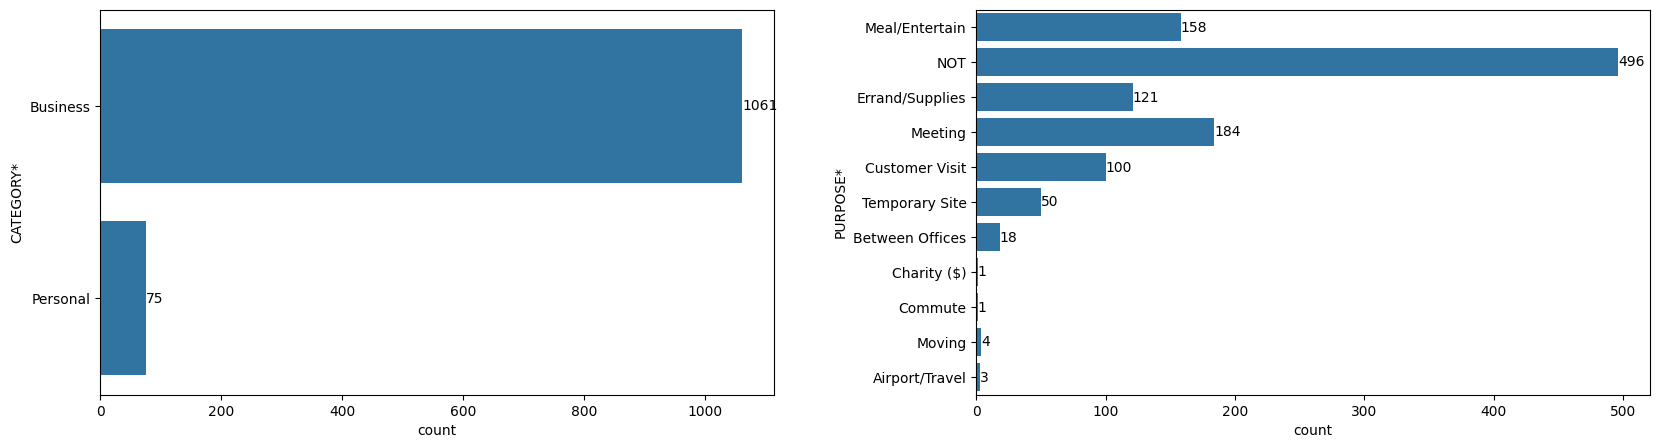

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
ax1 = sns.countplot(dataset['CATEGORY*'])
ax1.bar_label(ax1.containers[0])

plt.subplot(1,2,2)
ax2 = sns.countplot(dataset['PURPOSE*'])
ax2.bar_label(ax2.containers[0])
plt.subplots_adjust(wspace=0.3)

### Time of the Day

[Text(0, 0, '182'), Text(0, 0, '430'), Text(0, 0, '345'), Text(0, 0, '179')]

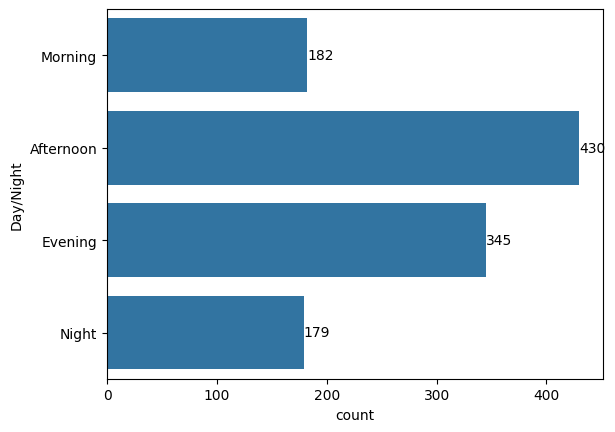

In [28]:
ax = sns.countplot(dataset['Day/Night'])
ax.bar_label(ax.containers[0])

### Monthly ride Analysis

In [43]:
dataset['Month'] = pd.DatetimeIndex(dataset['START_DATE*']).month
month_label = {1.0:'JAN',2.0:'FEB',3.0:'MAR',4.0:'APR',5.0:'MAY',6.0:'JUNE',7.0:'JULY',8.0:'AUG',9.0:'SEPT',10.0:'OCT',11.0:'NOV',12.0:'DEC'}
dataset['Month'] = dataset.Month.map(month_label)
mon = dataset.Month.value_counts(sort=False)

In [44]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Date,Time,Day/Night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,JAN
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,JAN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,JAN
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,JAN
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,JAN


In [54]:
df = pd.DataFrame({
    'Months': mon.values, 
    'Value Counts': dataset.groupby('Month', sort=False)['MILES*'].max().values
})

[Text(0.5, 0, 'Months'), Text(0, 0.5, 'Value Count')]

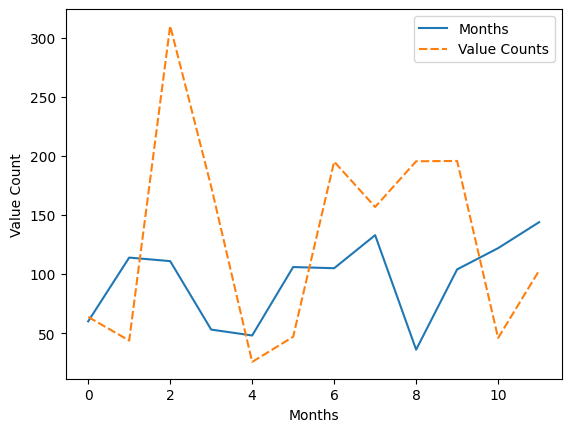

In [55]:
p = sns.lineplot(data=df)
p.set(xlabel="Months", ylabel="Value Count")

### Week of the Days

In [49]:
dataset['Day_of_Week'] = dataset['START_DATE*'].dt.weekday
day_label = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dataset['Day_of_Week'] = dataset['Day_of_Week'].map(day_label)

In [50]:
dataset.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Date,Time,Day/Night,Month,Day_of_Week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,JAN,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,JAN,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,JAN,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,JAN,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,JAN,Wed


<Axes: xlabel='Day_of_Week', ylabel='count'>

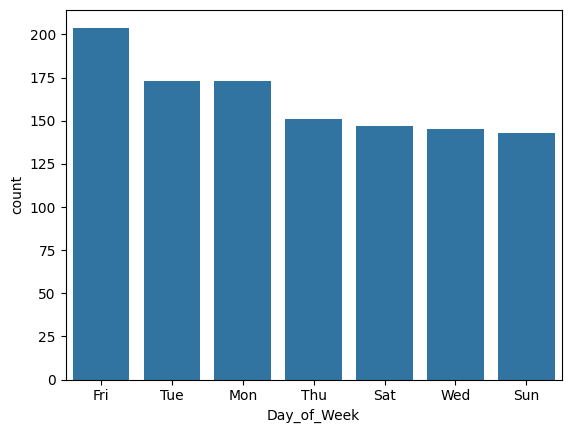

In [59]:
day_label = dataset.Day_of_Week.value_counts()
sns.barplot(x=day_label.index, y=day_label)

### Miles Analysis

<Axes: ylabel='MILES*'>

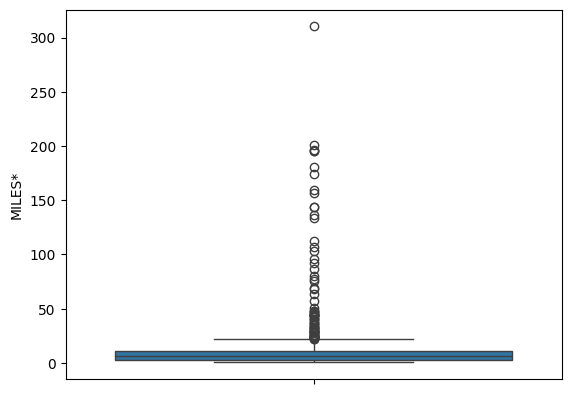

In [60]:
sns.boxplot(dataset['MILES*'])

<Axes: ylabel='MILES*'>

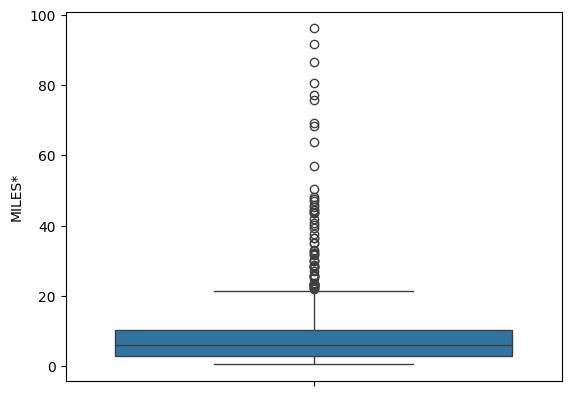

In [61]:
sns.boxplot(dataset[dataset['MILES*']<100]['MILES*'])

<Axes: ylabel='MILES*'>

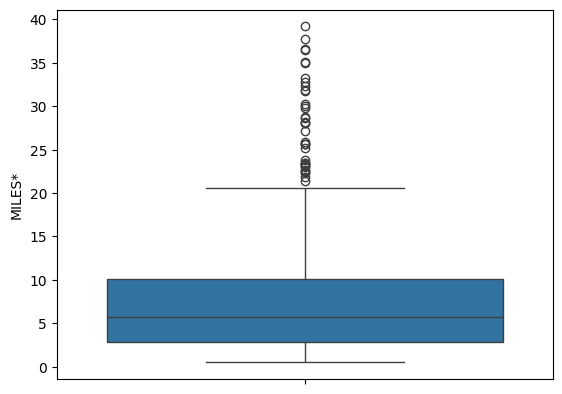

In [62]:
sns.boxplot(dataset[dataset['MILES*']<40]['MILES*'])

C:\Users\HP\AppData\Local\Temp\ipykernel_15020\564126997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES*']<40]['MILES*'])


<Axes: xlabel='MILES*', ylabel='Density'>

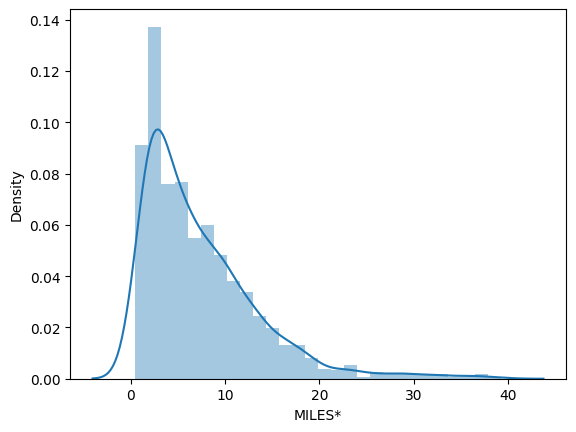

In [64]:
sns.distplot(dataset[dataset['MILES*']<40]['MILES*'])